In [1]:
# import all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading data

In [2]:
# load the dataset
df = pd.read_csv("train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# Print out the shape of the df 
print(f"rows: {df.shape[0]}")
print(f"columns: {df.shape[1]}")

rows: 2000
columns: 21


In [4]:
# What is in the columns? (e.g., datatypes, nulls)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
# Getting summary statistics for the df
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# 2. Data Cleaning

In [6]:
# Checking for null values 
df.isna().mean()

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

There are no null values

In [7]:
# Checking for duplicate columns 
df.T.duplicated()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

There are no duplicated data 

# 3. EDA

In [8]:
df['price_range'].unique()

array([1, 2, 3, 0])

array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'clock_speed'}>,
        <AxesSubplot:title={'center':'dual_sim'}>,
        <AxesSubplot:title={'center':'fc'}>],
       [<AxesSubplot:title={'center':'four_g'}>,
        <AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>,
        <AxesSubplot:title={'center':'mobile_wt'}>,
        <AxesSubplot:title={'center':'n_cores'}>],
       [<AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'px_height'}>,
        <AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>],
       [<AxesSubplot:title={'center':'sc_w'}>,
        <AxesSubplot:title={'center':'talk_time'}>,
        <AxesSubplot:title={'center':'three_g'}>,
        <AxesSubplot:title={'center':'touch_screen'}>,
        <AxesSubplot:title={'center':'wifi'}>],

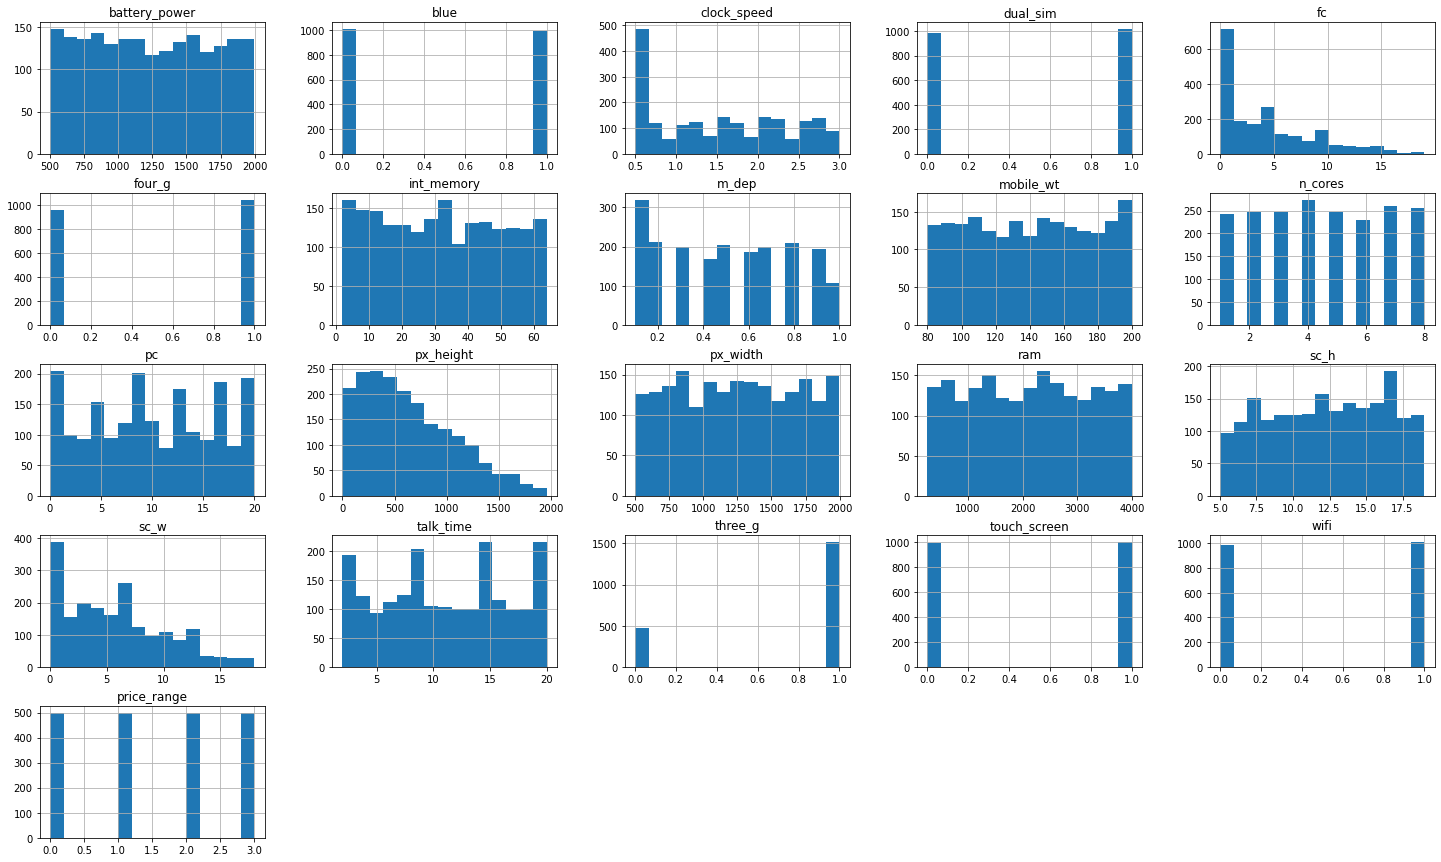

In [9]:
# Using pandas to make histograms
df.hist(figsize=(25,15), bins=15)
#plt.savefig('hist.png')

<AxesSubplot:>

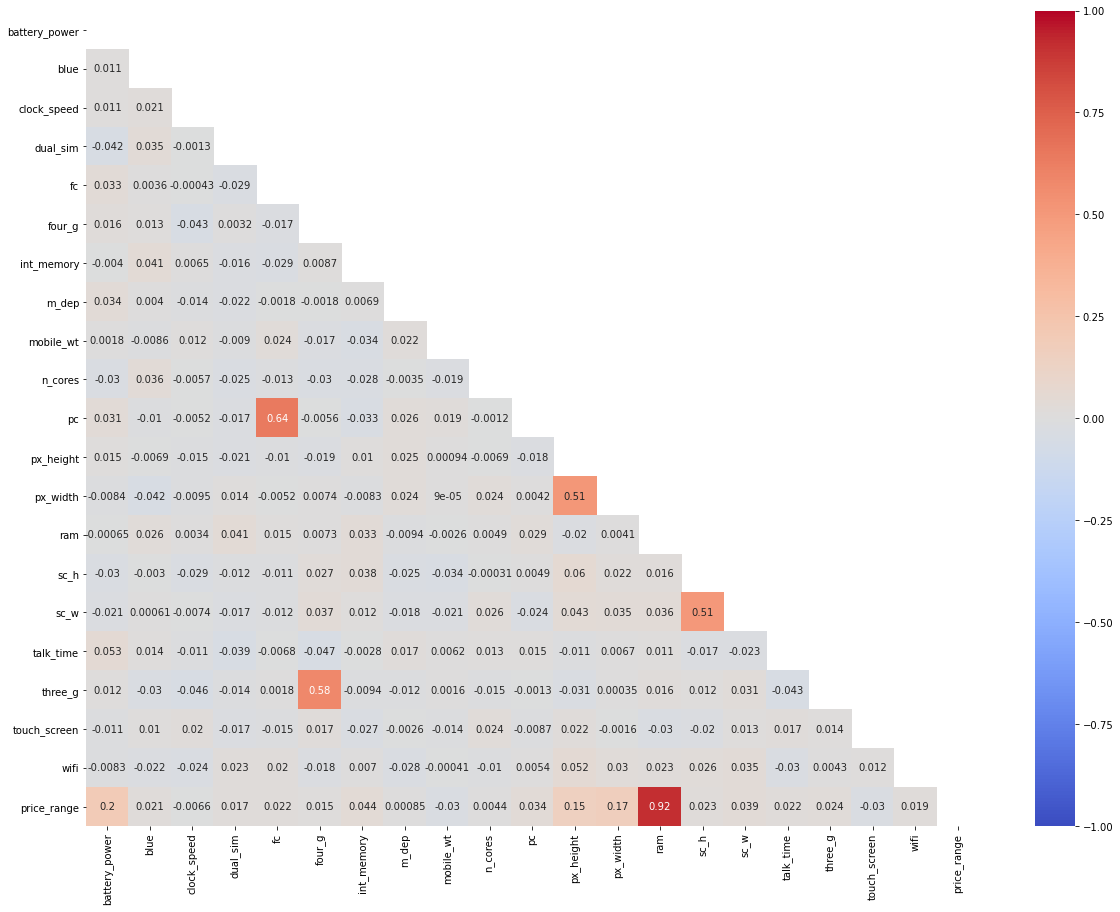

In [10]:
# Lets get the correlation matrix and save to variable 'corr_mat'
corr_mat = df.corr()
# Heatmap
plt.figure(figsize=(20,15))
matrix = np.triu(corr_mat)
sns.heatmap(corr_mat, cmap="coolwarm", vmin=-1, vmax=1, center=0, annot=True, mask=matrix)
#plt.savefig('corr.png')

- Front Camera mega pixels has a correlation with Primary Camera mega pixels
- four g has a correlation with three g

In [11]:
df[(df["three_g"]==0) & (df["four_g"]==0)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
19,682,1,0.5,0,4,0,19,1.0,121,4,...,902,1064,2337,11,1,18,0,1,1,1
22,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
30,1579,1,0.5,1,0,0,5,0.2,88,7,...,1358,1739,3532,17,11,12,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454,0,2.6,0,8,0,6,0.4,199,3,...,698,1018,1300,10,0,2,0,0,1,1
1982,1784,0,1.6,0,4,0,41,0.4,164,6,...,610,1437,2313,14,1,11,0,1,0,2
1983,1262,0,1.8,1,12,0,34,0.1,149,5,...,223,737,3248,13,3,4,0,1,1,2
1988,1547,1,2.9,0,2,0,57,0.4,114,1,...,347,957,1620,9,2,19,0,1,1,1


# 4. Building a logistic regression model

In [12]:
# Saving the independent variables to 'X'
X = df.drop("price_range", axis=1)
# Saving dependent variable to 'y'
y = df["price_range"]

In [13]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


### Check for multicollinearity

In [14]:
# import VIF function from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a VIF DataFrame:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Round the numbers to 2 decimal places:
vif.round(2)

,features,VIF Factor
0,battery_power,8.08
1,blue,1.98
2,clock_speed,4.26
3,dual_sim,2.02
4,fc,3.41
5,four_g,3.19
6,int_memory,3.96
7,m_dep,3.91
8,mobile_wt,12.97
9,n_cores,4.65


### train-test split

In [15]:
from sklearn.model_selection import train_test_split

# performing a train_test_split to better evaluate our model
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=1,
                                                   stratify = y)

### Base model

In [16]:
from sklearn.linear_model import LogisticRegression

# instantiate a logistic regression
logreg = LogisticRegression()

# fit the model to train set only
logreg.fit(X_train, y_train)

# score the model
print(f"train accuracy: {logreg.score(X_train, y_train)}")
print(f"test accuracy: {logreg.score(X_test, y_test)}")

train accuracy: 0.6314285714285715
test accuracy: 0.6516666666666666


/Users/rachelchen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Standardize features by removing the mean and scaling to unit variance.

In [17]:
from sklearn.preprocessing import StandardScaler

# FIT ON THE TRAINING DATA ONLY 
ss_scaler = StandardScaler()
ss_scaler.fit(X_train)

# transform
X_train_scaled = ss_scaler.transform(X_train)
X_test_scaled = ss_scaler.transform(X_test)

In [18]:
ss_logreg_Scaled = LogisticRegression(C=1)
ss_logreg_Scaled.fit(X_train_scaled, y_train)

print(ss_logreg_Scaled.score(X_train_scaled, y_train))
print(ss_logreg_Scaled.score(X_test_scaled, y_test))

0.975
0.96


### Principal component analysis (PCA)

In [19]:
from sklearn.decomposition import PCA

In [20]:
# Fit our PCA object
my_PCA = PCA()
my_PCA.fit(X_train_scaled)
X_train_PCA = my_PCA.transform(X_train_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

#### Select number of components

([<matplotlib.axis.XTick at 0x7fc8ba854fa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

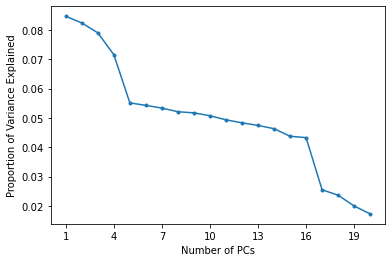

In [21]:
expl_var = my_PCA.explained_variance_ratio_
plt.figure()
plt.plot(range(1,21),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,21,3))
#plt.savefig('evr.png')

([<matplotlib.axis.XTick at 0x7fc8b7aa8400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

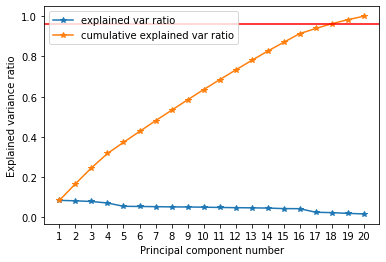

In [22]:
num_pcs = my_PCA.components_
plt.figure()
plt.plot(range(1, len(num_pcs)+1), my_PCA.explained_variance_ratio_, label="explained var ratio", marker="*")
plt.plot(range(1, len(num_pcs)+1), my_PCA.explained_variance_ratio_.cumsum(), label="cumulative explained var ratio", marker="*")
plt.axhline(y=0.96, color='r', linestyle='-')
plt.xlabel("Principal component number")
plt.ylabel("Explained variance ratio")
plt.legend()
plt.xticks(range(1, len(num_pcs)+1))
#plt.savefig('cevr.png')

In [23]:
# Fit our PCA object
my_PCA = PCA(n_components = 18)
my_PCA.fit(X_train_scaled)

X_train_PCA = my_PCA.transform(X_train_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

### Final model

In [24]:
lr = LogisticRegression(penalty='l2', multi_class='multinomial', solver='lbfgs', C = 100, max_iter = 1000)
lr.fit(X_train_PCA,y_train)

print(f'Train: {lr.score(X_train_PCA, y_train)}')
print(f'Test:{lr.score(X_test_PCA, y_test)}')

Train: 0.9871428571428571
Test:0.9783333333333334


# 5. Model evaluation 

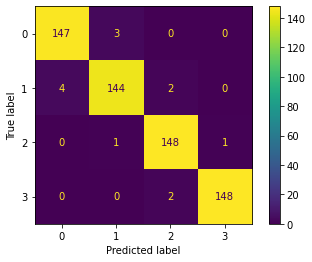

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = lr.predict(X_test_PCA)
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
# Plot
ConfusionMatrixDisplay(cf_matrix).plot()
#plt.savefig('cm.png')

In [26]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       150
           1       0.97      0.96      0.97       150
           2       0.97      0.99      0.98       150
           3       0.99      0.99      0.99       150

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



# 6. Interpret results

In [27]:
lr.intercept_

array([-14.31473916,  13.41119478,  13.73209258, -12.82854819])

In [28]:
#Generate column name for each PC
pca_cols = [f"PC{x}" for x in range(1, len(my_PCA.components_)+1)]
# putting training set into DataFrame 
X_train_PC = pd.DataFrame(X_train_PCA, columns=pca_cols)

X_train_PC

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,1.535928,-0.214172,-1.146919,-1.460582,0.425636,-0.764739,0.307920,-0.682414,-0.097724,0.093305,-0.629723,1.118457,-1.626918,0.438460,1.419506,-1.597905,1.499988,0.363136
1,-0.833183,-1.534890,-1.297737,-0.918489,-0.249224,1.163721,0.108291,-1.006380,0.922246,0.465661,0.619079,0.458571,1.575624,0.828857,0.422455,1.668400,-0.062536,-0.763233
2,-2.104017,-0.986453,-0.095758,-1.127777,-0.209327,0.469699,0.301322,-1.063142,-0.528593,-0.998950,0.958489,0.048572,1.199705,-0.922445,-0.581222,1.929423,0.107137,-0.621910
3,-1.676043,1.607796,0.297033,1.341239,1.755110,-0.061204,-1.189158,-0.666198,0.904696,-1.543775,1.356511,1.379664,0.229496,0.062913,-1.024367,1.147996,-0.084859,-0.323952
4,-0.643897,-1.468971,-1.482228,-1.030630,-0.515470,1.330708,-0.649800,-0.140727,-0.303972,0.616991,-0.074243,-0.519794,-0.404525,-0.169223,-0.223755,3.085328,-0.299352,0.703525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,-0.503644,0.320197,0.093929,1.722443,0.649109,0.950178,-2.230575,-0.173840,0.638051,0.479289,1.373123,0.842764,0.554399,-0.855899,-1.135027,0.577229,-0.664121,-0.754955
1396,-0.444952,1.506489,2.080921,2.760530,0.786524,0.288715,1.072396,0.359101,-1.096420,1.526070,-0.073053,0.152657,-1.521636,0.337149,0.943727,1.099506,-0.143438,-0.654166
1397,0.215600,0.396909,-2.291134,-0.020647,0.024583,0.592145,-2.014447,-0.599775,1.117638,-1.059378,-0.014248,-1.162339,1.444754,-0.107729,-1.226606,0.298700,0.806559,-0.441833
1398,-0.619003,-1.447522,-0.055886,0.822898,-0.020977,-0.483539,0.861057,-0.791126,0.733100,1.475792,0.418497,-0.928923,-0.502228,-0.242390,-0.719875,0.392097,-0.743372,0.731821


In [29]:
# Create a weights df
weights = pd.DataFrame(my_PCA.components_, columns=X_train.columns, index = pca_cols).transpose()
#Preview 
weights

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
battery_power,0.053534,0.027649,0.001606,0.088922,-0.338132,0.327598,-0.414171,0.010869,-0.176925,0.205881,-0.118166,0.066234,0.562578,-0.205339,0.346992,0.134429,0.018167,0.072399
blue,0.022145,-0.004616,-0.052421,-0.157545,-0.065465,0.576025,-0.056718,0.203840,-0.168004,-0.249079,0.228494,0.233646,0.087624,0.358907,-0.501245,0.065552,0.012116,-0.022089
clock_speed,0.018786,0.131083,0.014736,-0.008012,-0.140924,0.193337,0.205413,0.568362,0.342025,0.238233,-0.051208,-0.118589,0.018999,-0.437563,-0.220221,-0.358442,0.002443,0.019531
dual_sim,-0.017435,0.032849,-0.071697,-0.039008,0.456522,0.139317,0.065619,0.345978,-0.523149,0.015795,0.072205,-0.215108,0.000589,0.137306,0.406364,-0.357085,0.026261,-0.043831
fc,0.584473,-0.021997,0.387097,-0.013306,0.048563,0.016700,0.008105,0.013766,0.010907,0.025564,0.043002,0.050314,-0.029760,0.016827,0.013108,0.008998,-0.082789,-0.069570
four_g,0.233054,-0.509882,-0.377745,0.152711,-0.088164,0.016493,0.011128,0.011640,-0.026144,-0.013697,-0.010812,-0.035254,-0.016547,-0.008672,-0.032882,-0.101543,-0.039046,0.056779
int_memory,-0.065857,-0.077464,-0.031603,-0.019241,0.103353,0.302507,-0.257087,-0.031157,0.631042,0.075810,0.312681,0.055651,-0.190590,0.279113,0.425274,-0.128863,-0.045528,0.019427
m_dep,-0.031317,0.068578,0.012717,0.052321,-0.271879,-0.257795,-0.364820,-0.015718,-0.141092,-0.425643,0.534902,-0.011659,-0.074024,-0.295378,-0.021447,-0.365051,-0.027284,0.006431
mobile_wt,0.055779,0.069426,0.017309,0.036890,-0.066212,-0.305035,0.023652,0.328218,0.293230,-0.496118,-0.226587,-0.166025,0.466996,0.379023,0.091697,-0.031637,0.034127,0.017951
n_cores,-0.043693,0.002021,0.057537,-0.061208,-0.216079,0.191604,0.539816,-0.287633,-0.015338,-0.267844,-0.133708,0.459190,0.073278,-0.067157,0.288757,-0.373489,-0.004152,-0.002891


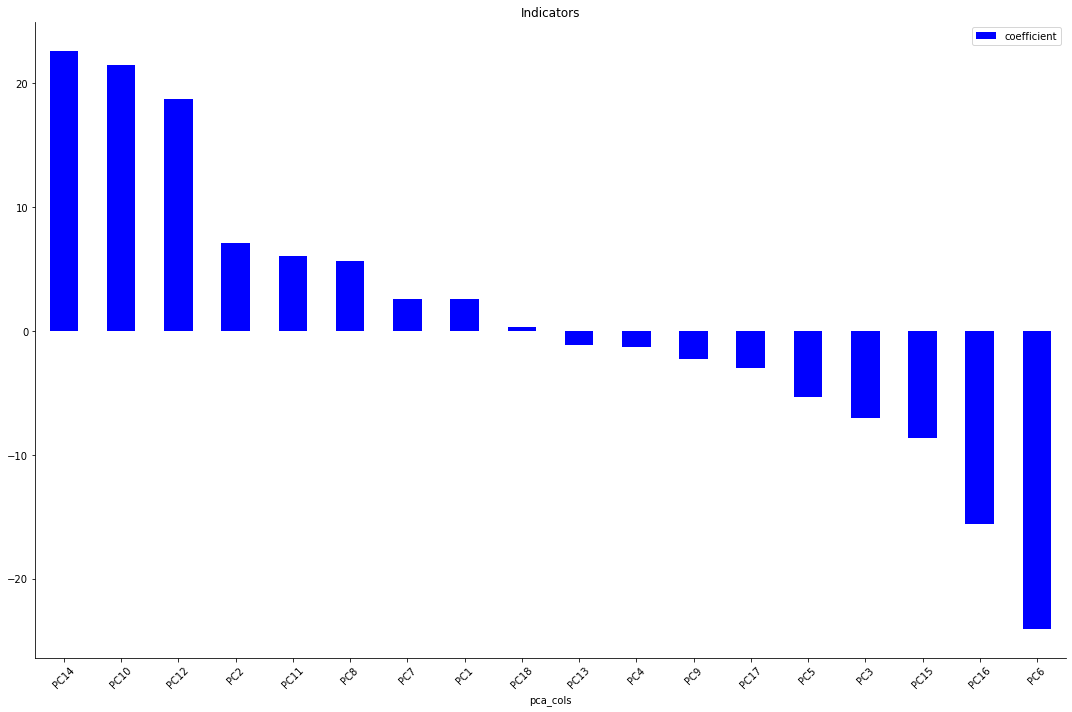

In [30]:
def plot_coefs(logreg, pca_cols):
    coef_df = pd.DataFrame({"coefficient": logreg.coef_[0], "pca_cols": pca_cols})
    coef_df = coef_df.sort_values("coefficient", ascending=False)

    fig, axs = plt.subplots(figsize=(15, 10))

    # coefficient
    coef_df.head(20).set_index("pca_cols").plot(kind="bar", rot=45, ax=axs, color="blue")
    axs.set_title("Indicators")
    
    sns.despine()
    plt.tight_layout()
    
plot_coefs(lr, pca_cols)
plt.savefig('coef.png')

In [31]:
lr.coef_[0]

array([  2.563853  ,   7.08956054,  -7.05916463,  -1.29334782,
        -5.33750449, -24.04901326,   2.60136134,   5.69026809,
        -2.25167175,  21.49143612,   6.09852224,  18.72587535,
        -1.12234817,  22.60261634,  -8.63591235, -15.61144615,
        -2.99028433,   0.29892303])

In [32]:
coef_df = pd.DataFrame({"coefficient": lr.coef_[0], "pca_cols": pca_cols})
coef_df_sorted = coef_df.sort_values("coefficient", ascending=False)
coef_df_sorted

,coefficient,pca_cols
13,22.602616,PC14
9,21.491436,PC10
11,18.725875,PC12
1,7.089561,PC2
10,6.098522,PC11
7,5.690268,PC8
6,2.601361,PC7
0,2.563853,PC1
17,0.298923,PC18
12,-1.122348,PC13


In [33]:
print(lr.intercept_)

[-14.31473916  13.41119478  13.73209258 -12.82854819]


In [34]:
coef_df

,coefficient,pca_cols
0,2.563853,PC1
1,7.089561,PC2
2,-7.059165,PC3
3,-1.293348,PC4
4,-5.337504,PC5
5,-24.049013,PC6
6,2.601361,PC7
7,5.690268,PC8
8,-2.251672,PC9
9,21.491436,PC10


In [35]:
# results = {}
# for index, name in enumerate(weights.index):
#     results[name] = sum(coef_df['coefficient'].values * weights.iloc[index].values)
#results

In [36]:
# final = pd.DataFrame.from_dict(results, orient='index', 
#                                columns=['coef']).sort_values(by=['coef'])
# final

In [37]:
weights.mul(coef_df['coefficient'].values).sum(axis=1)

battery_power   -11.940049
blue              0.177137
clock_speed       0.156535
dual_sim          0.103172
fc                0.181870
four_g            0.484746
int_memory       -0.981724
m_dep             0.449119
mobile_wt         1.918422
n_cores          -0.301813
pc               -0.340381
px_height        -7.504419
px_width         -6.636534
ram             -46.899711
sc_h             -0.183300
sc_w              0.062065
talk_time        -0.060521
three_g          -0.279213
touch_screen      0.170144
wifi              0.744704
dtype: float64

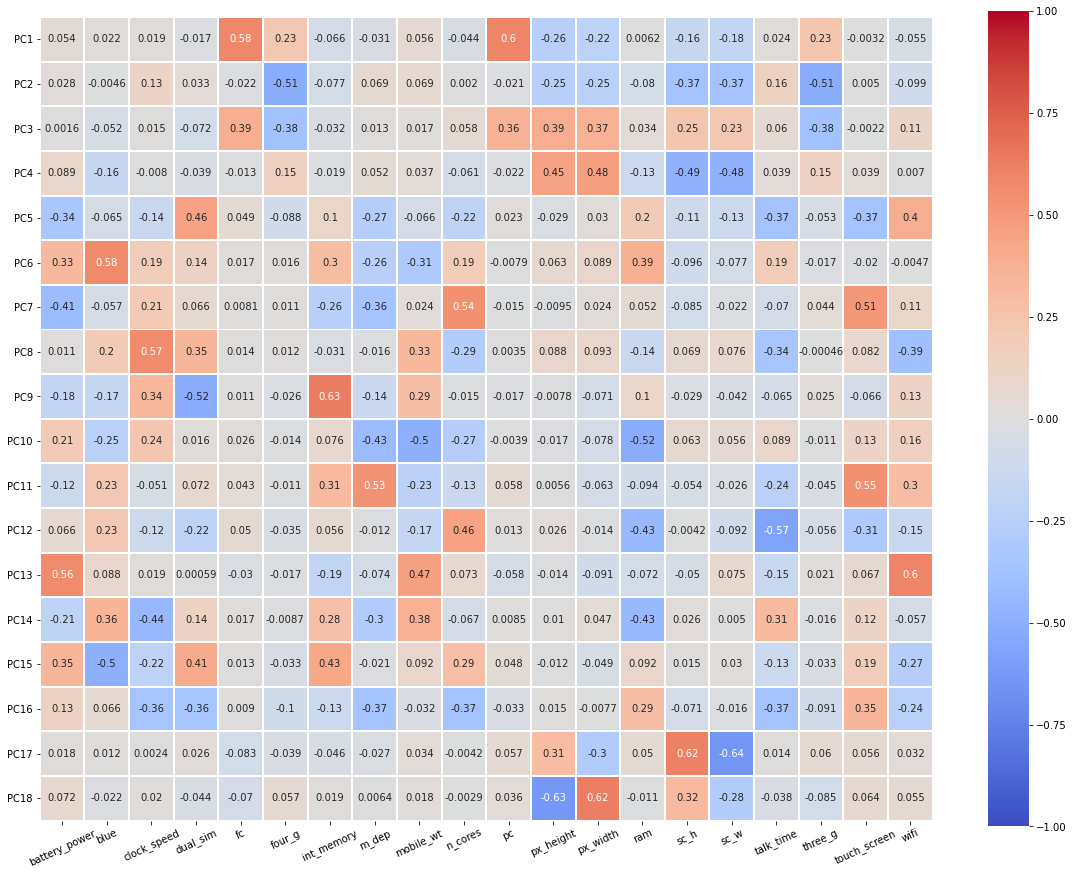

In [38]:
plt.figure(figsize=(20,15))

# Create a heatmap. The values are all contained in the .components_ attribute
ax = sns.heatmap(my_PCA.components_,
                 cmap='coolwarm',
                 yticklabels=[ "PC"+str(x) for x in range(1,my_PCA.n_components_+1)],
                 xticklabels=list(X.columns),
                 linewidths = 1,
                 annot = True,
                 vmin=-1,
                 vmax=1,
                 cbar_kws={"orientation": "vertical"})

plt.yticks(rotation=0)
plt.xticks(rotation=25)
ax.set_aspect("equal")
plt.savefig('final_.png')

In [39]:
lst=[]
lst.append(my_PCA.components_[5])
lst.append(my_PCA.components_[13])

In [40]:
lst

[array([ 0.32759764,  0.57602472,  0.19333694,  0.13931727,  0.01670034,
         0.01649322,  0.30250665, -0.25779516, -0.30503495,  0.19160416,
        -0.00793911,  0.0634795 ,  0.08867199,  0.38755145, -0.09588819,
        -0.0771956 ,  0.19444356, -0.0166164 , -0.01993399, -0.00467107]),
 array([-0.20533865,  0.3589069 , -0.43756309,  0.13730554,  0.01682733,
        -0.00867213,  0.27911271, -0.29537764,  0.37902325, -0.06715678,
         0.0085101 ,  0.00996327,  0.04656125, -0.43134032,  0.02646538,
         0.00502311,  0.31365158, -0.01629389,  0.1185362 , -0.05670389])]

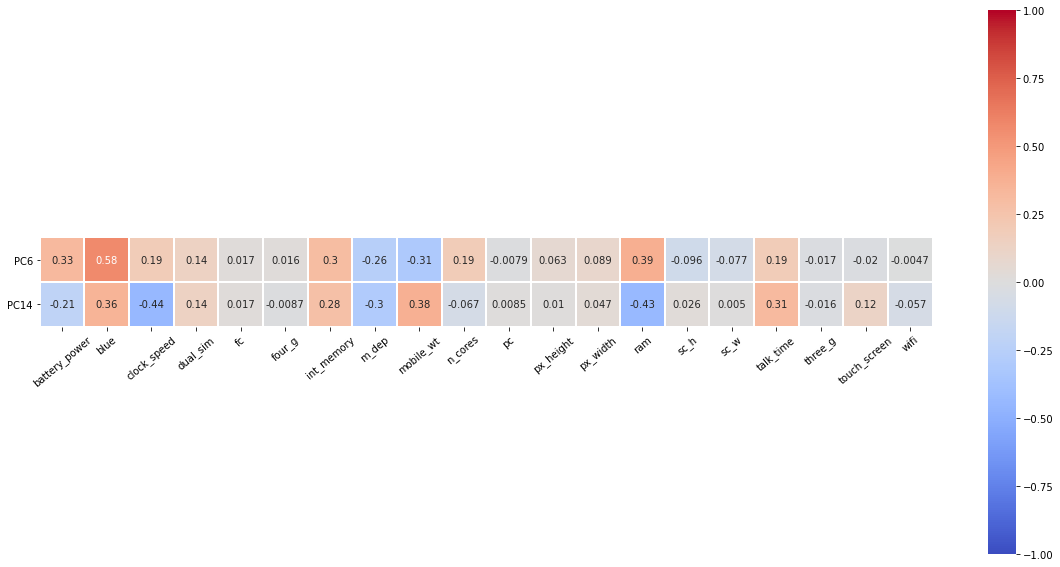

In [41]:
plt.figure(figsize=(20,10))

# Create a heatmap. The values are all contained in the .components_ attribute
ax = sns.heatmap(lst,
                 cmap='coolwarm',
                 yticklabels=["PC6","PC14"],
                 xticklabels=list(X.columns),
                 linewidths = 1,
                 annot = True,
                 vmin=-1,
                 vmax=1,
                 cbar_kws={"orientation": "vertical"})

plt.yticks(rotation=0)
plt.xticks(rotation=40)
ax.set_aspect("equal")
#plt.savefig('final.png')

In [42]:
my_PCA.explained_variance_ratio_

array([0.08469837, 0.0824057 , 0.07904058, 0.07157784, 0.05514128,
       0.05428689, 0.05336916, 0.05210803, 0.05173677, 0.05075349,
       0.04935823, 0.04833581, 0.04745808, 0.04633155, 0.04375498,
       0.04328023, 0.02548986, 0.02364877])

In [43]:
final_coef = pd.DataFrame(data= lr.coef_.T,
             index=pca_cols)
#final_coef.to_csv('final_coef.csv')

# Appendix

array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'clock_speed'}>,
        <AxesSubplot:title={'center':'dual_sim'}>],
       [<AxesSubplot:title={'center':'fc'}>,
        <AxesSubplot:title={'center':'four_g'}>,
        <AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>],
       [<AxesSubplot:title={'center':'mobile_wt'}>,
        <AxesSubplot:title={'center':'n_cores'}>,
        <AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'px_height'}>],
       [<AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>,
        <AxesSubplot:title={'center':'sc_w'}>],
       [<AxesSubplot:title={'center':'talk_time'}>,
        <AxesSubplot:title={'center':'three_g'}>,
        <AxesSubplot:title={'center':'touch_screen'}>,
        <AxesSubplot:title={'center':'wifi'}>]

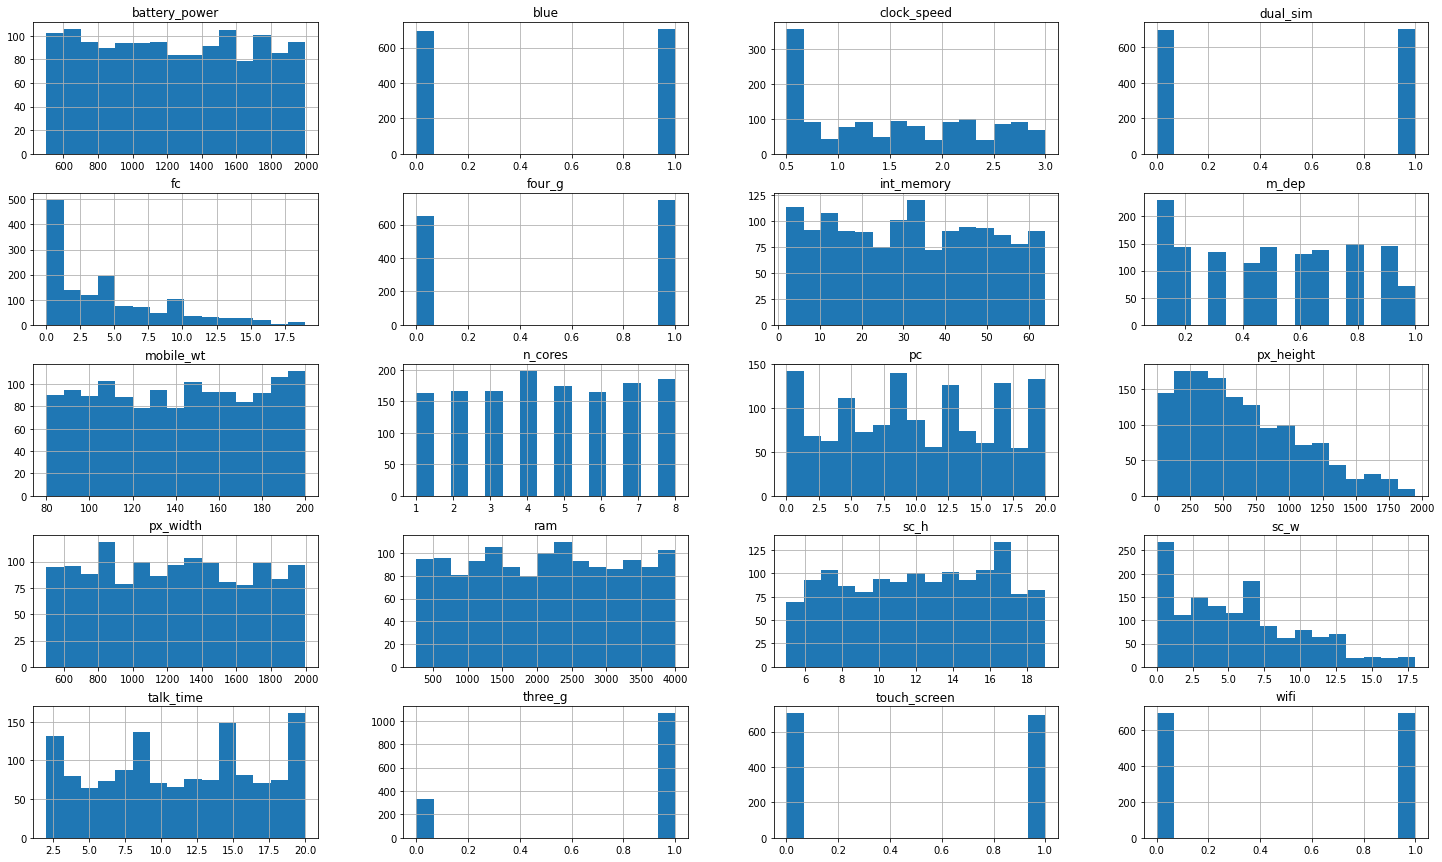

In [44]:
X_train.hist(figsize=(25,15), bins=15)

array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'clock_speed'}>,
        <AxesSubplot:title={'center':'dual_sim'}>],
       [<AxesSubplot:title={'center':'fc'}>,
        <AxesSubplot:title={'center':'four_g'}>,
        <AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>],
       [<AxesSubplot:title={'center':'mobile_wt'}>,
        <AxesSubplot:title={'center':'n_cores'}>,
        <AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'px_height'}>],
       [<AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>,
        <AxesSubplot:title={'center':'sc_w'}>],
       [<AxesSubplot:title={'center':'talk_time'}>,
        <AxesSubplot:title={'center':'three_g'}>,
        <AxesSubplot:title={'center':'touch_screen'}>,
        <AxesSubplot:title={'center':'wifi'}>]

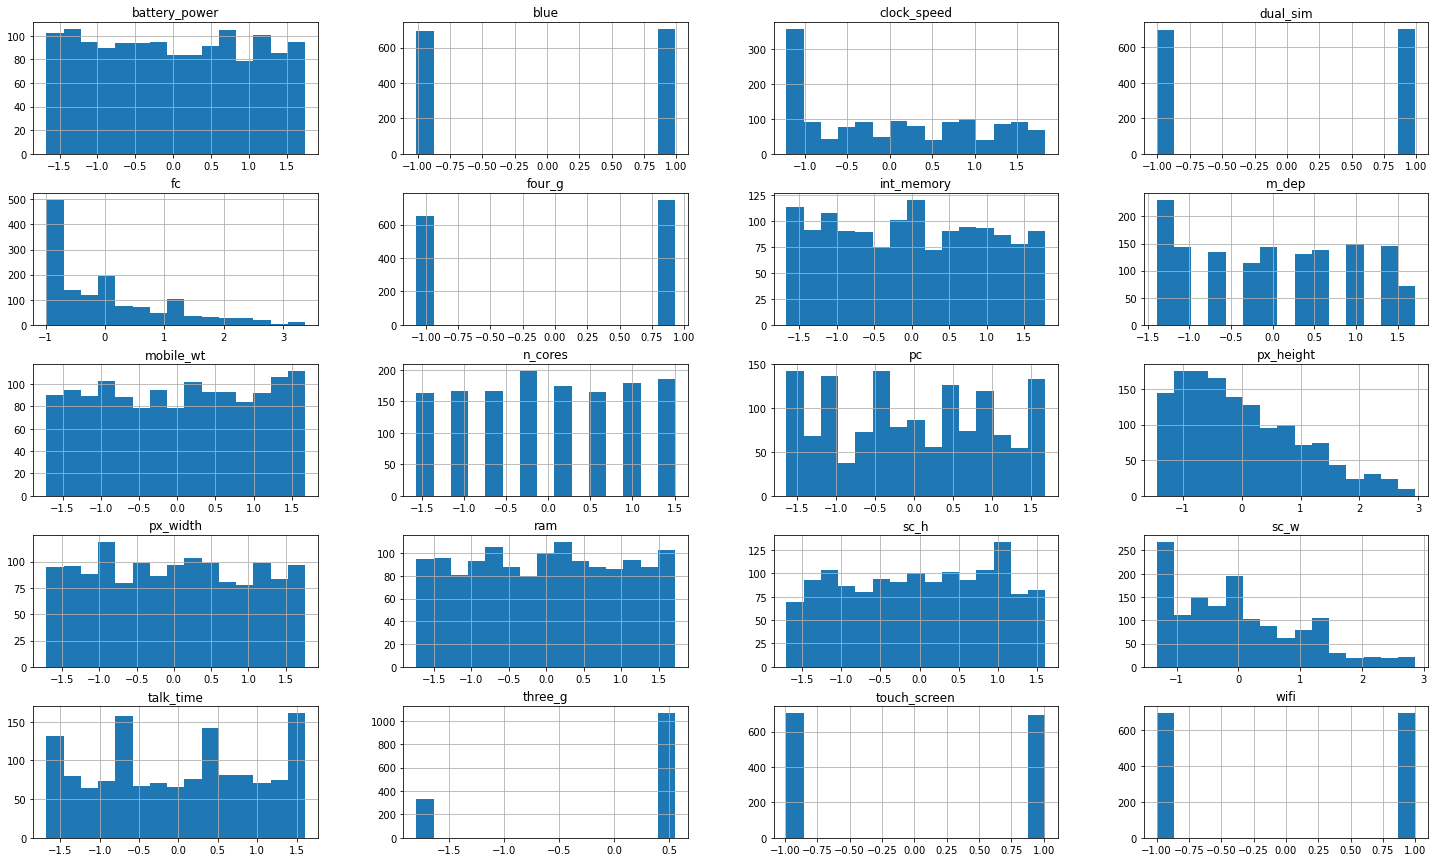

In [45]:
pd.DataFrame(X_train_scaled, columns=X.columns).hist(figsize=(25,15), bins=15)
#plt.savefig('scaled_hist.png')